In [56]:
# Check the name of the current folder
current_dir = !pwd
print(current_dir)

# List all files in this folder
file_list = !ls
print(file_list)

# List all files in the datasets directory
dataset_list = !ls datasets/
print(dataset_list)

# View the first 20 lines of datasets/road-accidents.csv
accidents_head = !head -n 20 datasets/road-accidents.csv
accidents_head

['/Users/suheylgurbuz/Desktop/python/reducing traffic mortality']
['datasets', 'reducing traffic mortality.ipynb']
['miles-driven.csv', 'road-accidents.csv']


['State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
 'Alabama,18.8,39,30,80',
 'Alaska,18.1,41,25,94',
 'Arizona,18.6,35,28,96',
 'Arkansas,22.4,18,26,95',
 'California,12.0,35,28,89',
 'Colorado,13.6,37,28,95',
 'Connecticut,10.8,46,36,82',
 'Delaware,16.2,38,30,99',
 'District of Columbia,5.9,34,27,100',
 'Florida,17.9,21,29,94',
 'Georgia,15.6,19,25,93',
 'Hawaii,17.5,54,41,87',
 'Idaho,15.3,36,29,98',
 'Illinois,12.8,36,34,96',
 'Indiana,14.5,25,29,95',
 'Iowa,15.7,17,25,87',
 'Kansas,17.8,27,24,85',
 'Kentucky,21.4,19,23,76',
 'Louisiana,20.5,35,33,98']

In [57]:
# Import the `pandas` module as "pd"
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv('/Users/suheylgurbuz/Desktop/python/reducing traffic mortality/datasets/road-accidents.csv', comment='#', sep=',')

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                                                                                     51 non-null object
Number of drivers involved in fatal collisions per billion miles                                          51 non-null float64
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                      51 non-null int64
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                              51 non-null int64
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents    51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [58]:
car_acc = car_acc.rename(columns={"State": "state",
                        "Number of drivers involved in fatal collisions per billion miles": "drvr_fatl_col_bmiles",
                        "Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding": "perc_fatl_speed",
                       "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired": "perc_fatl_alcohol",
                       "Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents": "perc_fatl_1st_time",
                       })

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


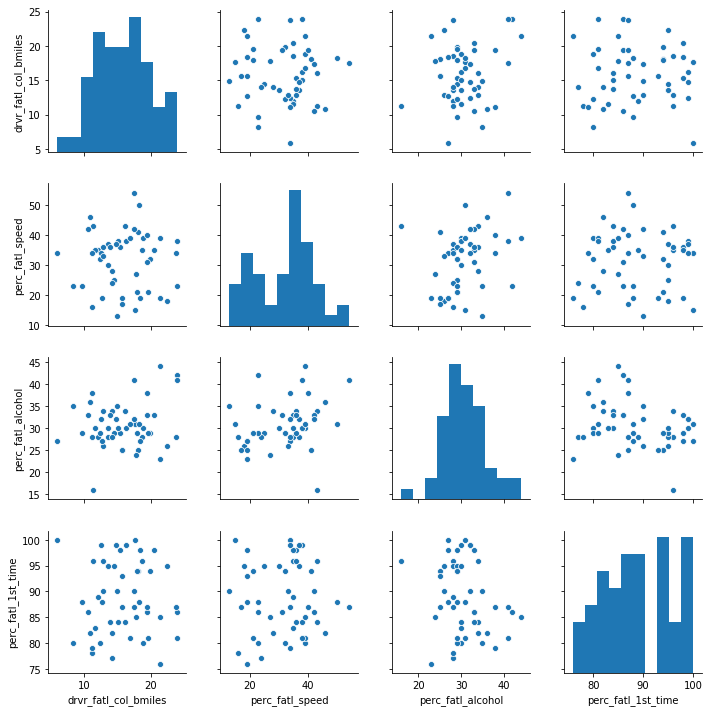

In [59]:
# import seaborn and make plots appear inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
sns.pairplot(data=car_acc)
plt.tight_layout()

In [60]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [61]:
# Import the linear model function from sklearn
import numpy as np
from sklearn.linear_model import LinearRegression

# Create the features and target DataFrames
features = car_acc[['perc_fatl_speed', 'perc_fatl_alcohol',
                             'perc_fatl_1st_time']]
target = car_acc['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

The cumulative variance of the first two principal components is 0.7947


/Users/suheylgurbuz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/suheylgurbuz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


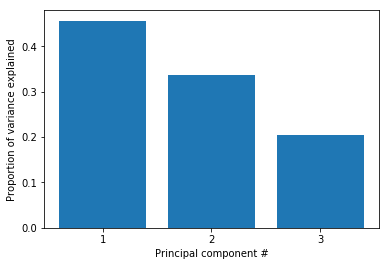

In [62]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))


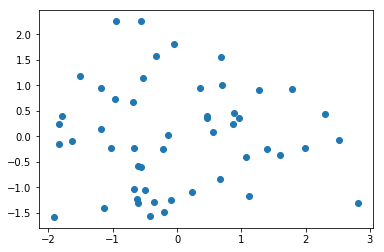

In [63]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

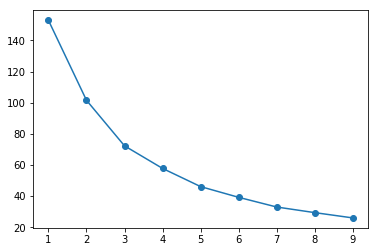

In [64]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

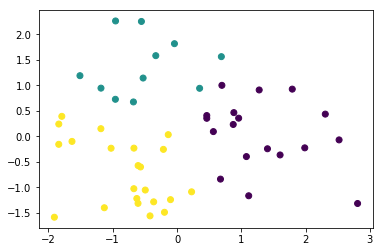

In [65]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

/Users/suheylgurbuz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


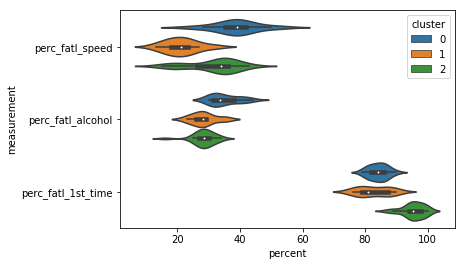

In [66]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars=['cluster'],
                  var_name='measurement', value_name='percent',
                  value_vars=['perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue=melt_car['cluster'])

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


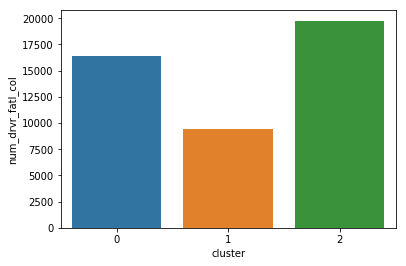

In [67]:
# Read in the new dataset
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = car_acc.merge(miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = (car_acc_miles['drvr_fatl_col_bmiles'] * 
                                      car_acc_miles['million_miles_annually']) / 1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

In [55]:
# Which cluster would you choose?
cluster_num = 2